In [ ]:
import pandas as pd

# Read the data from the CSV file
fp = 'BOS_shotgravity.csv'
df = pd.read_csv(fp)

df.head()

In [ ]:
# Give the min, max, mean, and median of the all the columns
df.describe()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read point masses from a CSV file
# CSV should have columns: x, y, m (no index)
fp = "BOS_shotgravity.csv"  # Replace with the path to your CSV file
data = pd.read_csv(fp)

# Extract x, y, and m values
masses = data[['x', 'y', 'm']].values  # Convert to NumPy array

# Gravitational constant (arbitrary scaling factor for visualization)
G = 1

# Create a grid of points
x_min, x_max = -249, 249
y_min, y_max = -41, 800
x, y = np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)
X, Y = np.meshgrid(x, y)

# Initialize the force vectors
Fx = np.zeros(X.shape)
Fy = np.zeros(Y.shape)

# Calculate the force at each grid point
for mx, my, m in masses:
    dx = mx - X
    dy = my - Y
    r = np.sqrt(dx**2 + dy**2)
    r3 = np.where(r != 0, r**3, np.inf)  # Avoid division by zero
    Fx += G * m * dx / r3
    Fy += G * m * dy / r3

# Normalize vectors for better visualization
F_magnitude = np.sqrt(Fx**2 + Fy**2)
Fx_normalized = Fx / F_magnitude
Fy_normalized = Fy / F_magnitude

# Plot the vector field
plt.figure(figsize=(20, 20))
plt.quiver(X, Y, Fx_normalized, Fy_normalized, np.log1p(F_magnitude), cmap='viridis')
plt.colorbar(label='Log of Force magnitude')
plt.scatter(data['x'], data['y'], color='red', alpha=0.1, label='Masses', s=5)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vector Field of Forces from Point Masses')
plt.grid()
plt.show()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning:

invalid value encountered in sqrt



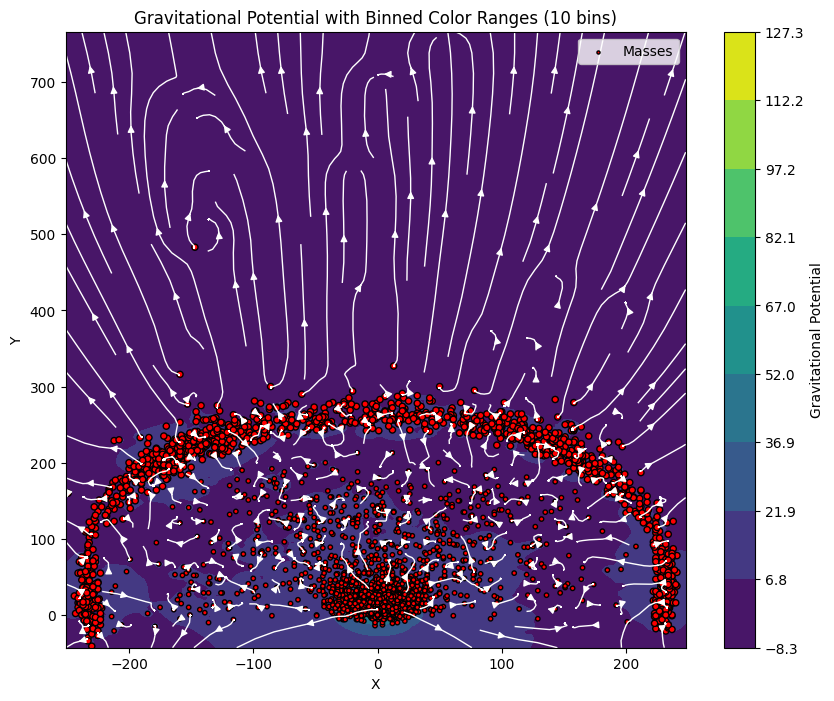

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Example DataFrame with x, y, and m values
fp = 'BOS_shotgravity.csv'
df = pd.read_csv(fp)

# Define the gravitational constant (arbitrary scale for visualization)
G = 1

# Create a grid for contour plotting
x_min, x_max = df['x'].min() - 2, df['x'].max() + 2
y_min, y_max = df['y'].min() - 2, df['y'].max() + 2
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Compute gravitational potential at each grid point
potential = np.zeros_like(x_grid)
for _, row in df.iterrows():
    potential += G * row['m'] / np.sqrt((x_grid - row['x'])**2 + (y_grid - row['y'])**2)

# Compute the gradients
dy, dx = np.gradient(-potential)

# Number of bins for color discretization
num_bins = 10

# Define the bins based on the potential values
bins = np.linspace(np.min(potential), np.max(potential), num_bins)

# Create a colormap (e.g., 'viridis') and apply the binning
plt.figure(figsize=(10, 8))

contour = plt.contourf(x_grid, y_grid, potential, levels=bins, cmap='viridis')

# Add a colorbar to indicate the bin ranges
cbar = plt.colorbar(contour)
cbar.set_label('Gravitational Potential')

# Overlay gradient lines (streamlines)
plt.streamplot(x_grid, y_grid, dx, dy, color='white', linewidth=1)

# Plot the masses for reference
plt.scatter(df['x'], df['y'], c='red', s=df['m']*10, label='Masses', edgecolor='black')

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Gravitational Potential with Binned Color Ranges ({num_bins} bins)')
plt.legend()
plt.show()

In [71]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Read point masses from a CSV file
csv_file = "BOS_shotgravity.csv"
data = pd.read_csv(csv_file)

# Extract x, y, and m values
masses = data[['x', 'y', 'm']].values  # Convert to NumPy array

# Gravitational constant (arbitrary scaling factor for visualization)
G = 1

# Create a grid of points
x_min, x_max = -250, 250
y_min, y_max = -42, 458
x, y = np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101)
X, Y = np.meshgrid(x, y)

# Initialize the potential energy array
U = np.zeros(X.shape)

# Calculate the potential energy at each grid point
for mx, my, m in masses:
    dx = X - mx
    dy = Y - my
    r = np.sqrt(dx**2 + dy**2)
    r = np.where(r != 0, r, np.inf)  # Avoid division by zero
    U += G * m / r

# Scale the potential energy for better visualization
U_scaled = (U - U.min()) / (U.max() - U.min())
U_min, U_max = U.min(), U.max()
U_scaled = np.log10(np.log10(U + 1))  # Log scaling for better contrast

# Create the 3D interactive plot using Plotly
fig = go.Figure()

# Add the surface for potential energy
fig.add_trace(go.Surface(z=U_scaled, x=X, y=Y, colorscale='inferno', colorbar=dict(title="Shot Potential")))

# Update layout for better visualization
fig.update_layout(
    title="Shot Potential Energy - Boston Celtics 2023-2024 Season",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Shot Potential'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the interactive plot
fig.show()
fig.write_html("BOS_potential_energy.html")